In [14]:
from itertools import combinations
from scipy.stats import bootstrap
import numpy as np
import pickle


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [9]:
labels = ["MPT (Holme-Kim)", 
          "MPT (Random)", 
          "CPT (Holme-Kim)",
          "CPT (Random)",
          "MPT (Holme-Kim) + Low RA",
          "MPT (SDA)",
          "CPT (SDA)"]

comparisons = list(combinations(labels, 2))
comparisons

[('MPT (Holme-Kim)', 'MPT (Random)'),
 ('MPT (Holme-Kim)', 'CPT (Holme-Kim)'),
 ('MPT (Holme-Kim)', 'CPT (Random)'),
 ('MPT (Holme-Kim)', 'MPT (Holme-Kim) + Low RA'),
 ('MPT (Holme-Kim)', 'MPT (SDA)'),
 ('MPT (Holme-Kim)', 'CPT (SDA)'),
 ('MPT (Random)', 'CPT (Holme-Kim)'),
 ('MPT (Random)', 'CPT (Random)'),
 ('MPT (Random)', 'MPT (Holme-Kim) + Low RA'),
 ('MPT (Random)', 'MPT (SDA)'),
 ('MPT (Random)', 'CPT (SDA)'),
 ('CPT (Holme-Kim)', 'CPT (Random)'),
 ('CPT (Holme-Kim)', 'MPT (Holme-Kim) + Low RA'),
 ('CPT (Holme-Kim)', 'MPT (SDA)'),
 ('CPT (Holme-Kim)', 'CPT (SDA)'),
 ('CPT (Random)', 'MPT (Holme-Kim) + Low RA'),
 ('CPT (Random)', 'MPT (SDA)'),
 ('CPT (Random)', 'CPT (SDA)'),
 ('MPT (Holme-Kim) + Low RA', 'MPT (SDA)'),
 ('MPT (Holme-Kim) + Low RA', 'CPT (SDA)'),
 ('MPT (SDA)', 'CPT (SDA)')]

# Confidence Interval Comparison (individual level)

In [20]:
with open("../data/category_count_results_individual.pickle", "rb") as f:
    individual_results = pickle.load(f)
individual_results.keys()

dict_keys(['MPT (Holme-Kim)', 'MPT (Random)', 'CPT (Holme-Kim)', 'CPT (Random)', 'MPT (Holme-Kim) + Low RA', 'MPT (SDA)', 'CPT (SDA)'])

In [21]:
for category in range(5):
    for c in comparisons:
        c1, c2 = c
        c1_data = np.array(individual_results[c1][category])
        c2_data = np.array(individual_results[c2][category])
        res1 = bootstrap((c1_data,), np.mean)
        res2 = bootstrap((c2_data,), np.mean)
        if (res1.confidence_interval[1] < res2.confidence_interval[0]) or \
           (res1.confidence_interval[0] > res2.confidence_interval[1]) or \
           ((np.std(c1_data) == 0 or np.std(c2_data) == 0) and c1_data[0]!=c2_data[0]):
            print(f"{c1} and {c2} are significantly different for category {category}.")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_resampling.py:144: RuntimeWarning: invalid value encountered in double_scalars
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 0.
MPT (Holme-Kim) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
MPT (Holme-Kim) and MPT (SDA) are significantly different for category 0.
MPT (Holme-Kim) and CPT (SDA) are significantly different for category 0.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Random) and CPT (Random) are significantly different for category 0.
MPT (Random) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
MPT (Random) and MPT (SDA) are significantly different for category 0.
MPT (Random) and CPT (SDA) are significantly different for category 0.
CPT (Holme-Kim) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
CPT (Holme-Kim) and MPT (SDA) are significantly different for category 0.
CPT (Random) and MPT (Holme-Kim) + Low RA are significantly diff

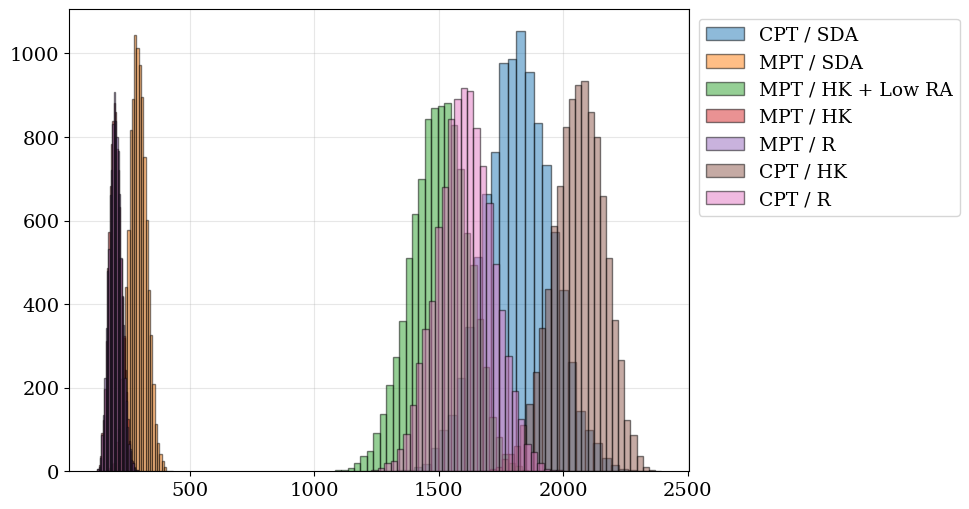

In [28]:
cat = 4

t = np.array(individual_results["CPT (SDA)"][cat])
u = np.array(individual_results["MPT (SDA)"][cat])
v = np.array(individual_results["MPT (Holme-Kim) + Low RA"][cat])
w = np.array(individual_results["MPT (Holme-Kim)"][cat])
x = np.array(individual_results["MPT (Random)"][cat])
y = np.array(individual_results["CPT (Holme-Kim)"][cat])
z = np.array(individual_results["CPT (Random)"][cat])

res_t = bootstrap((t,), np.mean)
res_u = bootstrap((u,), np.mean)
res_v = bootstrap((v,), np.mean)
res_w = bootstrap((w,), np.mean)
res_x = bootstrap((x,), np.mean)
res_y = bootstrap((y,), np.mean)
res_z = bootstrap((z,), np.mean)

labels = ["CPT / SDA", "MPT / SDA", "MPT / HK + Low RA", "MPT / HK", "MPT / R", "CPT / HK", "CPT / R"]
for i,item in enumerate([res_t, res_u, res_v, res_w, res_x, res_y, res_z]):
    plt.hist(item.bootstrap_distribution, alpha=0.5, edgecolor="k", bins=30, label=labels[i])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Confidence Interval Comparison (community level)

In [29]:
with open("../data/category_count_results_communities.pickle", "rb") as f:
    community_results = pickle.load(f)
community_results.keys()

dict_keys(['MPT (Holme-Kim)', 'MPT (Random)', 'CPT (Holme-Kim)', 'CPT (Random)', 'MPT (Holme-Kim) + Low RA', 'MPT (SDA)', 'CPT (SDA)'])

In [30]:
for category in range(5):
    for c in comparisons:
        c1, c2 = c
        c1_data = np.array(community_results[c1][category])
        c2_data = np.array(community_results[c2][category])
        res1 = bootstrap((c1_data,), np.mean)
        res2 = bootstrap((c2_data,), np.mean)
        if (res1.confidence_interval[1] < res2.confidence_interval[0]) or \
           (res1.confidence_interval[0] > res2.confidence_interval[1]) or \
           ((np.std(c1_data) == 0 or np.std(c2_data) == 0) and c1_data[0]!=c2_data[0]):
            print(f"{c1} and {c2} are significantly different for category {category}.")

MPT (Holme-Kim) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Holme-Kim) and CPT (Random) are significantly different for category 0.
MPT (Holme-Kim) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
MPT (Holme-Kim) and CPT (SDA) are significantly different for category 0.
MPT (Random) and CPT (Holme-Kim) are significantly different for category 0.
MPT (Random) and CPT (Random) are significantly different for category 0.
MPT (Random) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
MPT (Random) and CPT (SDA) are significantly different for category 0.
CPT (Holme-Kim) and CPT (Random) are significantly different for category 0.
CPT (Holme-Kim) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
CPT (Holme-Kim) and MPT (SDA) are significantly different for category 0.
CPT (Random) and MPT (Holme-Kim) + Low RA are significantly different for category 0.
CPT (Random) and MPT (SDA) are significantly d

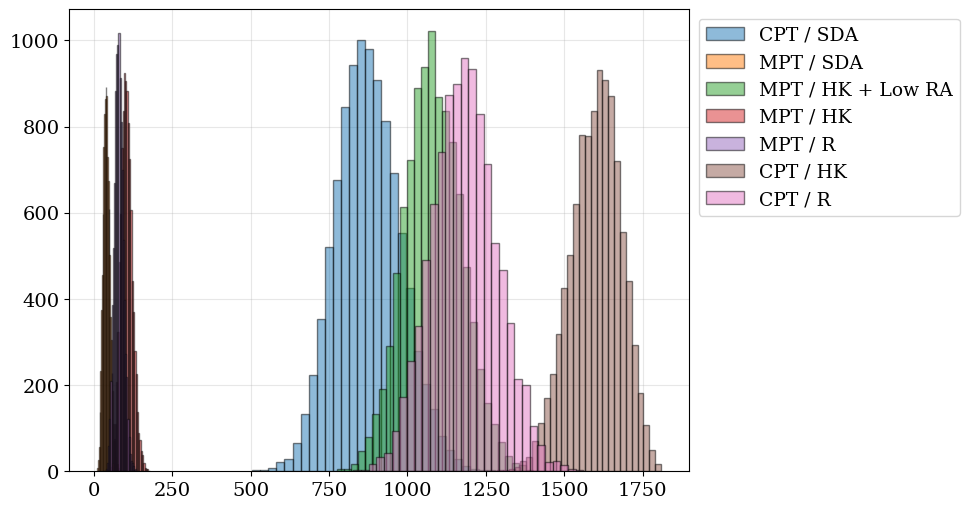

In [31]:
cat = 4

t = np.array(community_results["CPT (SDA)"][cat])
u = np.array(community_results["MPT (SDA)"][cat])
v = np.array(community_results["MPT (Holme-Kim) + Low RA"][cat])
w = np.array(community_results["MPT (Holme-Kim)"][cat])
x = np.array(community_results["MPT (Random)"][cat])
y = np.array(community_results["CPT (Holme-Kim)"][cat])
z = np.array(community_results["CPT (Random)"][cat])

res_t = bootstrap((t,), np.mean)
res_u = bootstrap((u,), np.mean)
res_v = bootstrap((v,), np.mean)
res_w = bootstrap((w,), np.mean)
res_x = bootstrap((x,), np.mean)
res_y = bootstrap((y,), np.mean)
res_z = bootstrap((z,), np.mean)

labels = ["CPT / SDA", "MPT / SDA", "MPT / HK + Low RA", "MPT / HK", "MPT / R", "CPT / HK", "CPT / R"]
for i,item in enumerate([res_t, res_u, res_v, res_w, res_x, res_y, res_z]):
    plt.hist(item.bootstrap_distribution, alpha=0.5, edgecolor="k", bins=30, label=labels[i])
plt.legend(bbox_to_anchor=(1,1))
plt.show()